### Homework 3
#### Emma Menio
#### GEOS 560V - Mathematical Modeling of Geological Processes
#### Professor Covington
#### 18 October 2017

In [1]:
%pylab inline
#%pylab
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


# Question 1

In [2]:
# Derive the coupled ODE's that describe the system
#
#
# Q1 = A_c*sqrt(2*g*(h1-h2)/Cf)
# dh1_dt = (R-Q1)/A_R1
# 
# Q2 = A_c*sqrt(2*g*(h2)/Cf)
# dh2_dt = (Q1-Q2)/A_R2
#
# Cf = 1. + f*L/D_h

### Explanation 

Q1 represents the discharge from the first, larger, reservoir, which is being fed by a recharge value, R. The equation for calculating discharge for the first reservoir/pipe constriction (Q1) is a function of the cross sectional area of the pipe (A_c), the change in head between the larger and smaller reservoirs (h1, h2), gravity (g) and the pipe characteristics, Cf: flow length, L, friction factor, f, and hydraulic diameter, D_h. The change in head over time (dh1_dt) is a function of the difference in water fluxes to the reservoir (recharge minus discharge) over the reservoir area. Q1 will reflect direct changes in recharge.

Q2 represents the discharge from the second reservoir, which is fed from Q1. This equation is a function of the pipe characteristics as mentioned above, and the head value of the second, smaller reservoir. Since there is only one head value, we assume end head condition is zero. The change in head over time (dh2_dt) for this part of the system is a function of the change in discharge in and out (Q1 minus Q2) over the reservoir area. Q2 will reflect changes in Q1.


# Question 2

H1 equilibrium value: 16.71 meters
H2 equilibrium value: 8.35 meters


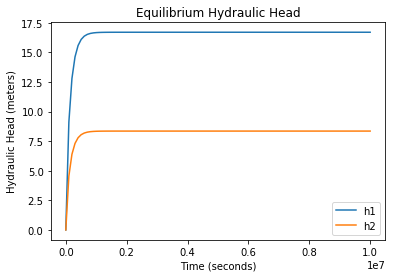

In [54]:
# Define Parameters
D_h = 1.0 #meters
L = 1000. #meters
f = 0.1 #friction factor
g = 9.8 #m/s^2
A_c = pi*(D_h**2/4) #cross-sectional area, m^2

A_R1 = 5000. #m^2
A_R2 = 50. #m^2
R = 1. #m^3/s
h0 = [0., 0.]

# Define function of dh_dt
def dh_dt(h, tdummy, A_c, D_h, L, f, R, A_R1, A_R2):
    h1, h2 = h
    Cf = 1. + f*L/D_h
    Q1 = A_c*sign(h1-h2)*sqrt(2*g*abs(h1-h2)/Cf)
    Q2 = A_c*sign(h2)*sqrt(2*g*abs(h2)/Cf)
    return ((R-Q1)/A_R1, (Q1-Q2)/A_R2)

# Define timestep
t = linspace(0,10000000,100)

# Run Odeint
result = odeint(dh_dt, h0, t, args=(A_c, D_h, L, f, R, A_R1, A_R2))

H1 = result[:,0]
H2 = result[:,1]

# Plot
plot(t, H1, label = "h1")
plot(t, H2, label = "h2")
ylabel('Hydraulic Head (meters)')
xlabel('Time (seconds)')
title ('Equilibrium Hydraulic Head')
legend()


# Equilibrium values
print "H1 equilibrium value: %.2f meters" %H1[-1]
print "H2 equilibrium value: %.2f meters" %H2[-1]


# Question 3

In [55]:
# Define Parameters
D_h = 1.0 #meters
L = 1000. #meters
f = 0.1 #friction factor
g = 9.8 #m/s^2
A_c = pi*(D_h**2/4) #cross-sectional area, m^2
A_R1 = 5000. #m^2
A_R2 = 50. #m^2

h0 = [0., 0.]
h_eq = [16.71, 8.35]
Cf = 1. + f*L/D_h

# Define function of dh_dt, R is 
def dh_dt_r(h, tdummy, A_c, D_h, L, f, A_R1, A_R2, omega):
    h1, h2 = h
    Cf = 1. + f*L/D_h
    R = sin(omega*tdummy) + 1.
    q1 = A_c*sign(h1-h2)*sqrt(2*g*abs(h1-h2)/Cf)
    q2 = A_c*sign(h2)*sqrt(2*g*abs(h2)/Cf)
    return ((R-q1)/A_R1, (q1-q2)/A_R2)

## Case 1

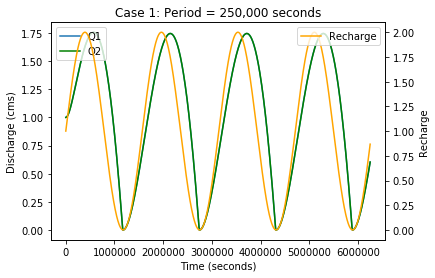

In [56]:
# Define parameters
omega_a = 4.*10**-6 #s^-1, P = 250,000 seconds
P_a = 1. / omega_a

# Define timestep
tstep = 1000
t_a = linspace(0,(25.*P_a),tstep)

# Run Odeint
#a = odeint(dh_dt_r, h0, t_a, args=(A_c, D_h, L, f, A_R1, A_R2, omega_a))
a = odeint(dh_dt_r, h_eq, t_a, args=(A_c, D_h, L, f, A_R1, A_R2, omega_a))

H1_a = a[:,0]
H2_a = a[:,1]

# Calculating Discharge
Q1_a = A_c*sign(H1_a-H2_a)*sqrt(2*g*abs(H1_a-H2_a)/Cf)
Q2_a = A_c*sign(H2_a)*sqrt(2*g*abs(H2_a)/Cf)
R_a = sin(omega_a * t_a) + 1

# Plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t_a, Q1_a, label = "Q1")
ax1.plot(t_a, Q2_a, label = "Q2", color='g')
ax2.plot(t_a, R_a, label = 'Recharge', color = 'orange')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Discharge (cms)')
ax2.set_ylabel('Recharge')
title('Case 1: Period = 250,000 seconds')
ax1.legend(loc='upper left')
ax2.legend(loc ='upper right')

### Explanation


When the period is 250,000 seconds and starting at equilibrium head values, both Q1 and Q2 lag the recharge, but change together in magnitude. Their trends are almost indistinguishable because the timescale is long enough that both discharges adjust fully to changes in recharge.


## Case 2 

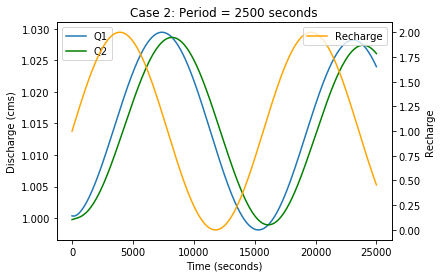

In [57]:
# Define Parameters
omega_b = 4.*10**-4 #s^-1, Period = 2500 seconds
P_b = 1. / omega_b

# Define timestep
tstep = 1000
t_b = linspace(0,(10.*P_b),tstep)


# Run Odeint
#b = odeint(dh_dt_r, h0, t_b, args=(A_c, D_h, L, f, A_R1, A_R2, omega_b))
b = odeint(dh_dt_r, h_eq, t_b, args=(A_c, D_h, L, f, A_R1, A_R2, omega_b))

H1_b = b[:,0]
H2_b = b[:,1]

# Calculating Discharge
Q1_b = A_c*sign(H1_b-H2_b)*sqrt(2*g*abs(H1_b-H2_b)/Cf)
Q2_b = A_c*sign(H2_b)*sqrt(2*g*abs(H2_b)/Cf)
R_b = sin(omega_b * t_b) + 1

# Plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t_b, Q1_b, label = "Q1")
ax1.plot(t_b, Q2_b, label = "Q2", color = 'g')
ax2.plot(t_b, R_b, label = 'Recharge', color = 'orange')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Discharge (cms)')
ax2.set_ylabel('Recharge')
title('Case 2: Period = 2500 seconds')
ax1.legend(loc='upper left')
ax2.legend(loc ='upper right')

### Explanation

In the second case, the period is 2500, so shorter than the first case, so the two discharges start to differentiate. Since Q1 is directly related to the large reservoir and recharge input, it changes in tandem with the recharge, just slightly out of phase do to the lag time from filling up the large aquifer. Q2 is a function of Q1 and the second, smaller reservoir, which is showing a more buffered response to change in recharge.


## Case 3

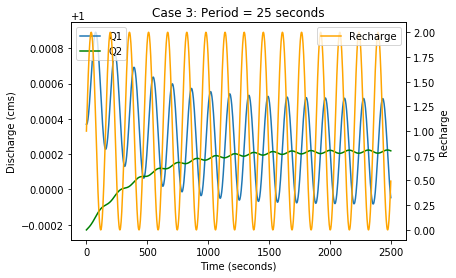

In [59]:
# Define Parameters
omega_c = 4.*10**-2 #s^-1, Period = 25 seconds
P_c = 1. / omega_c

# Define timestep
tstep = 1000
t_c = linspace(0,(100.*P_c),tstep)

# Run Odeint
#c = odeint(dh_dt_r, h0, t_c, args=(A_c, D_h, L, f, A_R1, A_R2, omega_c))
c = odeint(dh_dt_r, h_eq, t_c, args=(A_c, D_h, L, f, A_R1, A_R2, omega_c))

H1_c = c[:,0]
H2_c = c[:,1]

# Calculating Discharge
Q1_c = A_c*sign(H1_c-H2_c)*sqrt(2*g*abs(H1_c-H2_c)/Cf)
Q2_c = A_c*sign(H2_c)*sqrt(2*g*abs(H2_c)/Cf)
R_c = sin(omega_c * t_c) + 1

# Plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t_c, Q1_c, label = "Q1")
ax1.plot(t_c, Q2_c, label = "Q2", color = 'g')
ax2.plot(t_c, R_c, label = 'Recharge', color = 'orange')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Discharge (cms)')
ax2.set_ylabel('Recharge')
title('Case 3: Period = 25 seconds')
ax1.legend(loc='upper left')
ax2.legend(loc ='upper right')

### Explanation

In the third case, the period is the shortest, at 25 seconds. Both discharges do not have enough time to adjust to recharge changes. For Q1, the first reservoir feels the pulses of recharge input, and therefore changes in tandem with recharge, but the pulses are quick enough to not allow reservoir 1 to reach equilibrium. As the head equilibrates, the overall trend of Q1 levels out. For Q2, its amplitude doesn’t vary much, as most of the accommodation is being absorbed by Q1 and reservoir 1. Over time, the storage of reservoir 2 increases and then stabilizes at an equilibrium discharge of Q2.


## Switching order of two reservoirs


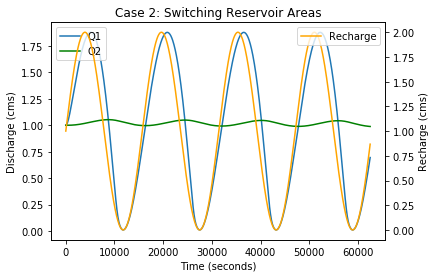

In [63]:
# Define Parameters
omega_b = 4.*10**-4 #s^-1, Period = 2500 seconds
P_sw = 1. / omega_b

# Define timestep
tstep = 1000
t_sw = linspace(0,(25.*P_sw),tstep)


# Run Odeint, switching the reservoir areas, below are h0 and h_eq settings
#sw = odeint(dh_dt_r, h0, t_sw, args=(A_c, D_h, L, f, A_R2, A_R1, omega_b))
sw = odeint(dh_dt_r, h_eq, t_sw, args=(A_c, D_h, L, f, A_R2, A_R1, omega_b))

H1_sw = sw[:,0]
H2_sw = sw[:,1]

# Calculating Discharge
Q1_sw = A_c*sign(H1_sw-H2_sw)*sqrt(2*g*abs(H1_sw-H2_sw)/Cf)
Q2_sw = A_c*sign(H2_sw)*sqrt(2*g*abs(H2_sw)/Cf)
R_sw = sin(omega_b * t_sw) + 1

# Plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t_sw, Q1_sw, label = "Q1")
ax1.plot(t_sw, Q2_sw, label = "Q2", color = 'g')
ax2.plot(t_sw, R_sw, label = 'Recharge', color = 'orange')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Discharge (cms)')
ax2.set_ylabel('Recharge (cms)')
title('Case 2: Switching Reservoir Areas')
ax1.legend(loc='upper left')
ax2.legend(loc ='upper right')

### Explanation 

Starting at equilibrium, when the smaller reservoir is put first, Q1 changes almost instantaneously with recharge (in case b), because its surface area is smaller and therefore the head will increase faster than the large reservoir. It is more sensitive to change. Q2 will change as Q1 pulses more water into the second reservoir, but the reservoir is much larger, and therefore takes a much larger signal to change Q2. The larger reservoir is more of a buffer for the system, and over time is relatively constant.